# Predict wine quality using linear regression. Train a model, evaluate, and document insights for accurate predictions in this machine learning task.

# **Author: AHMED REKIK.**

### THE MACHINE LEARNING INTERNSHIP.

# **MODULES IMPORTATION**

In [69]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [ ]:
wine = pd.read_csv("/content/winequalityN.csv")
wine.head()


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [6]:
wine.shape

(6497, 13)

In [10]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# **Visualization**

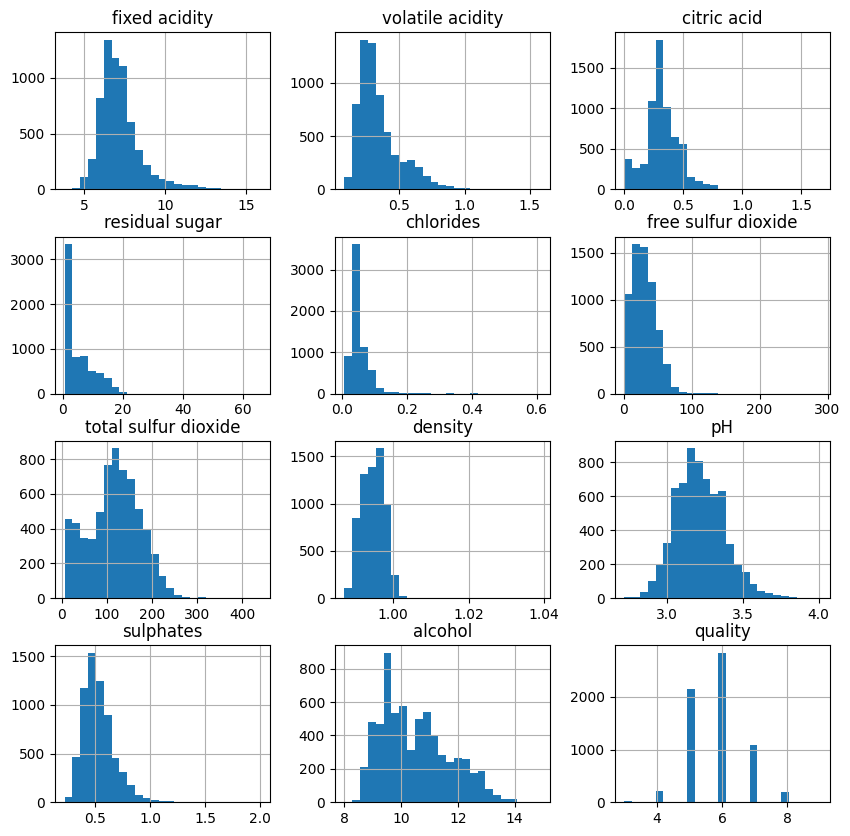

In [11]:
wine.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Text(0, 0.5, 'alcohol')

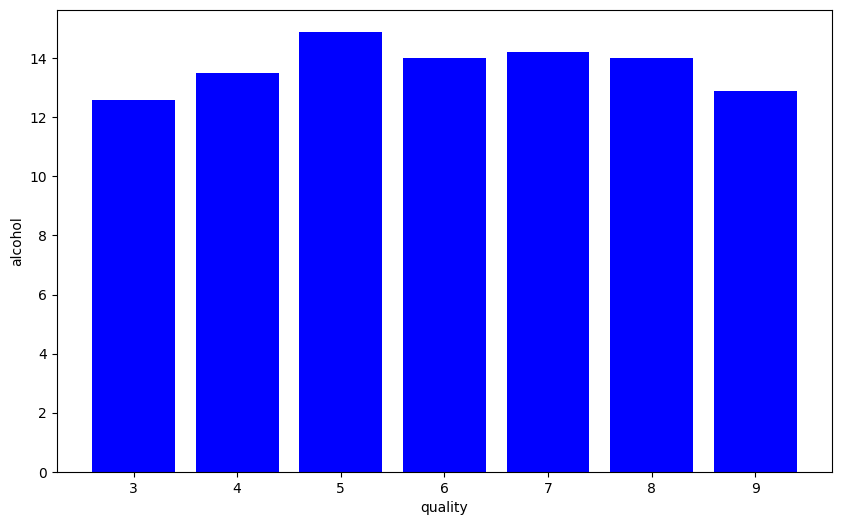

In [12]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(wine['quality'],wine['alcohol'],color='blue')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

<Axes: >

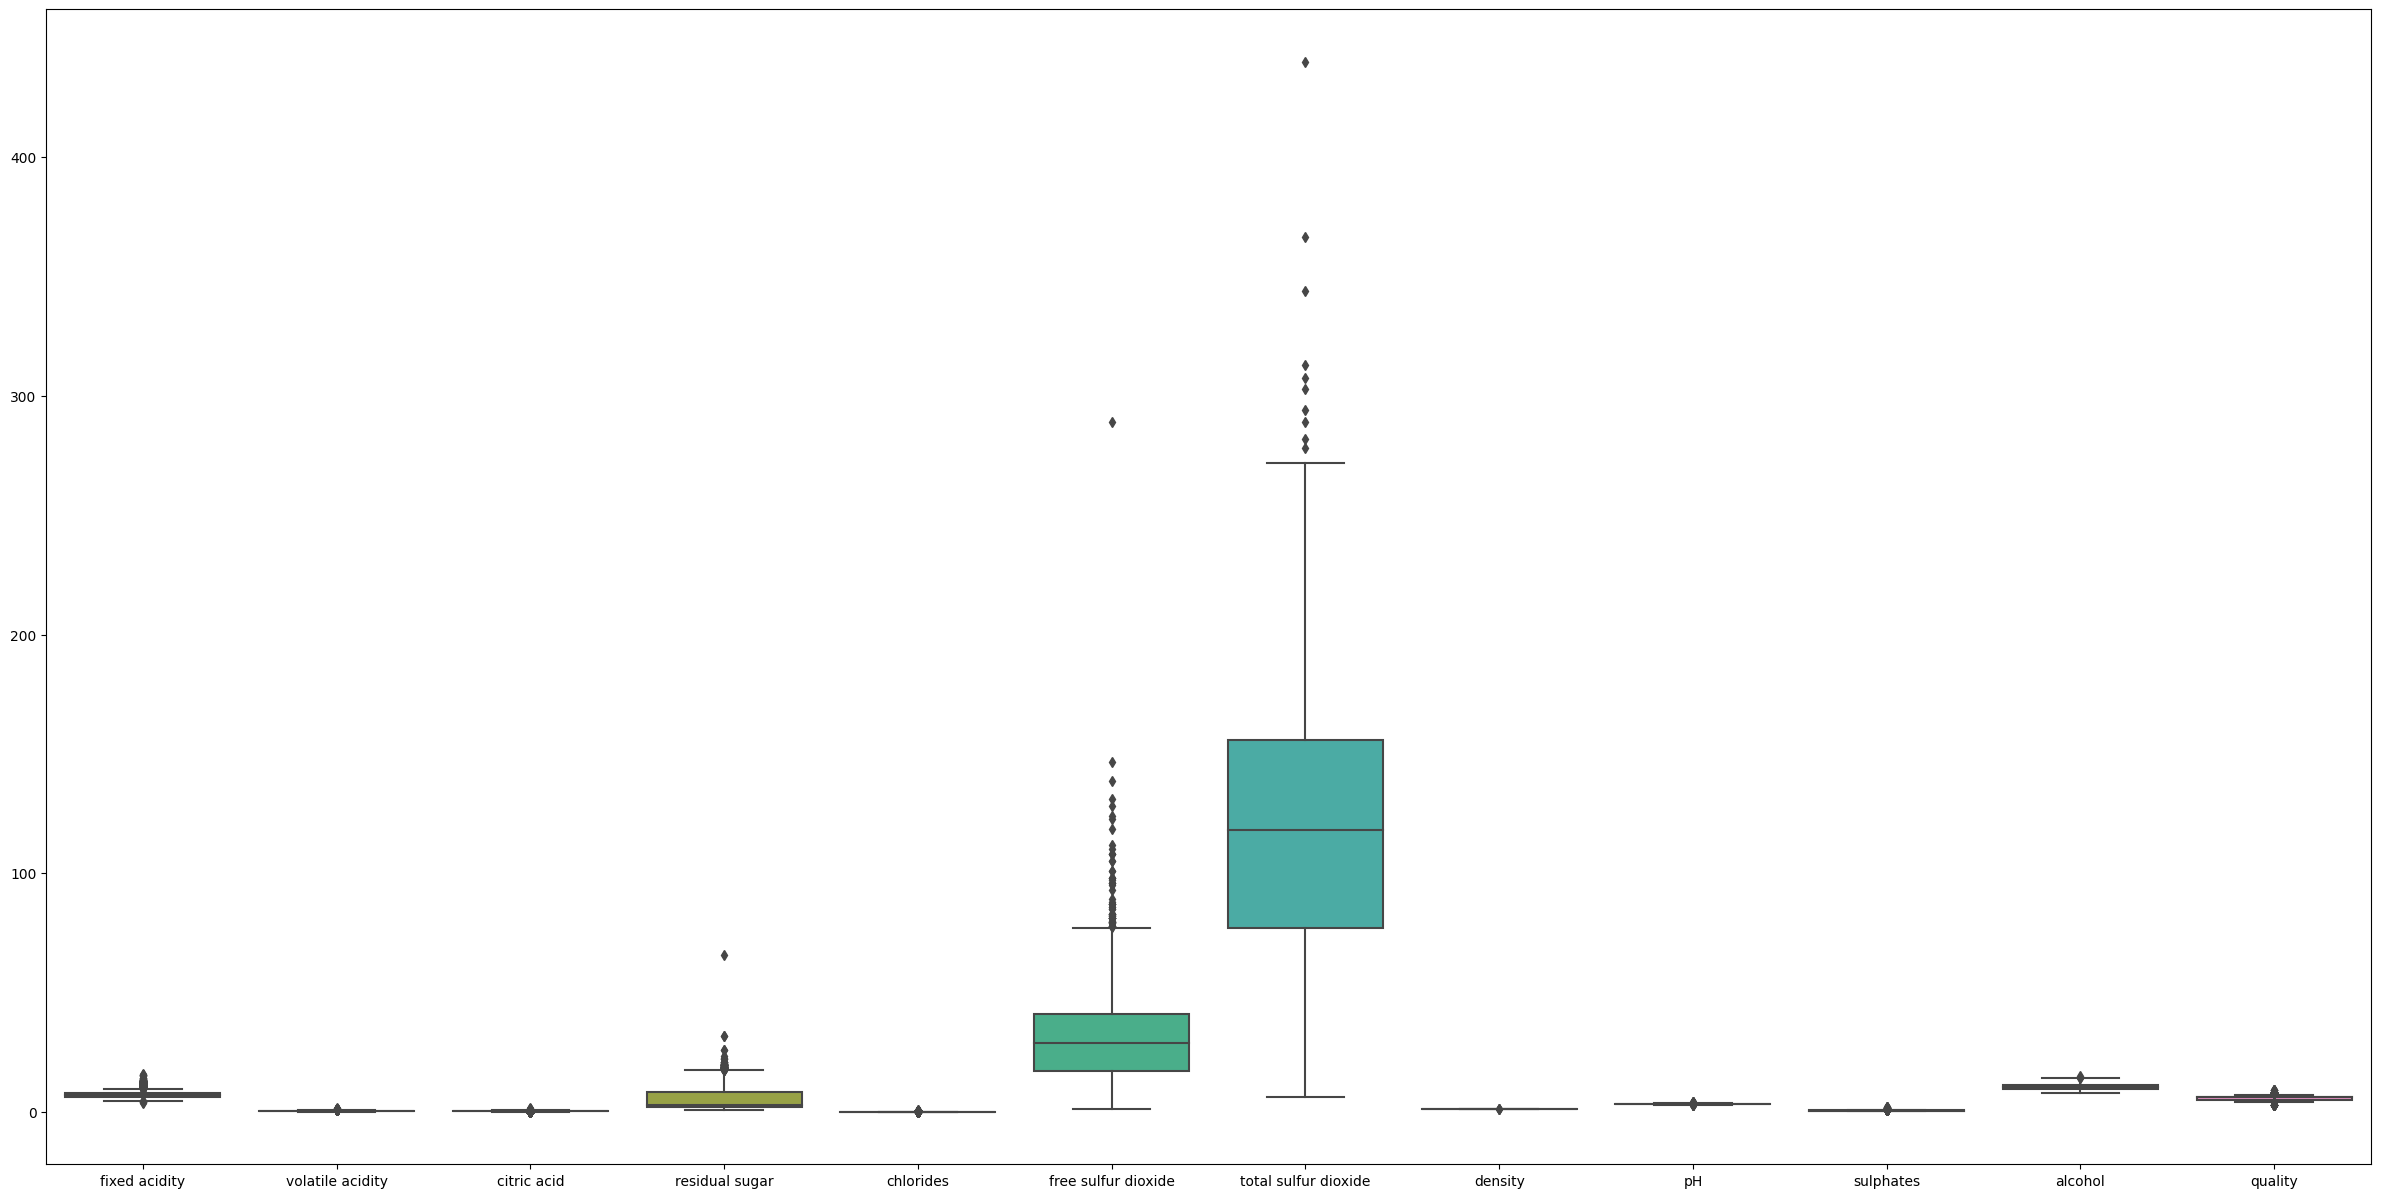

In [53]:
plt.figure(figsize=(30,15))
sb.boxplot(data=wine)

<Figure size 3000x1500 with 0 Axes>

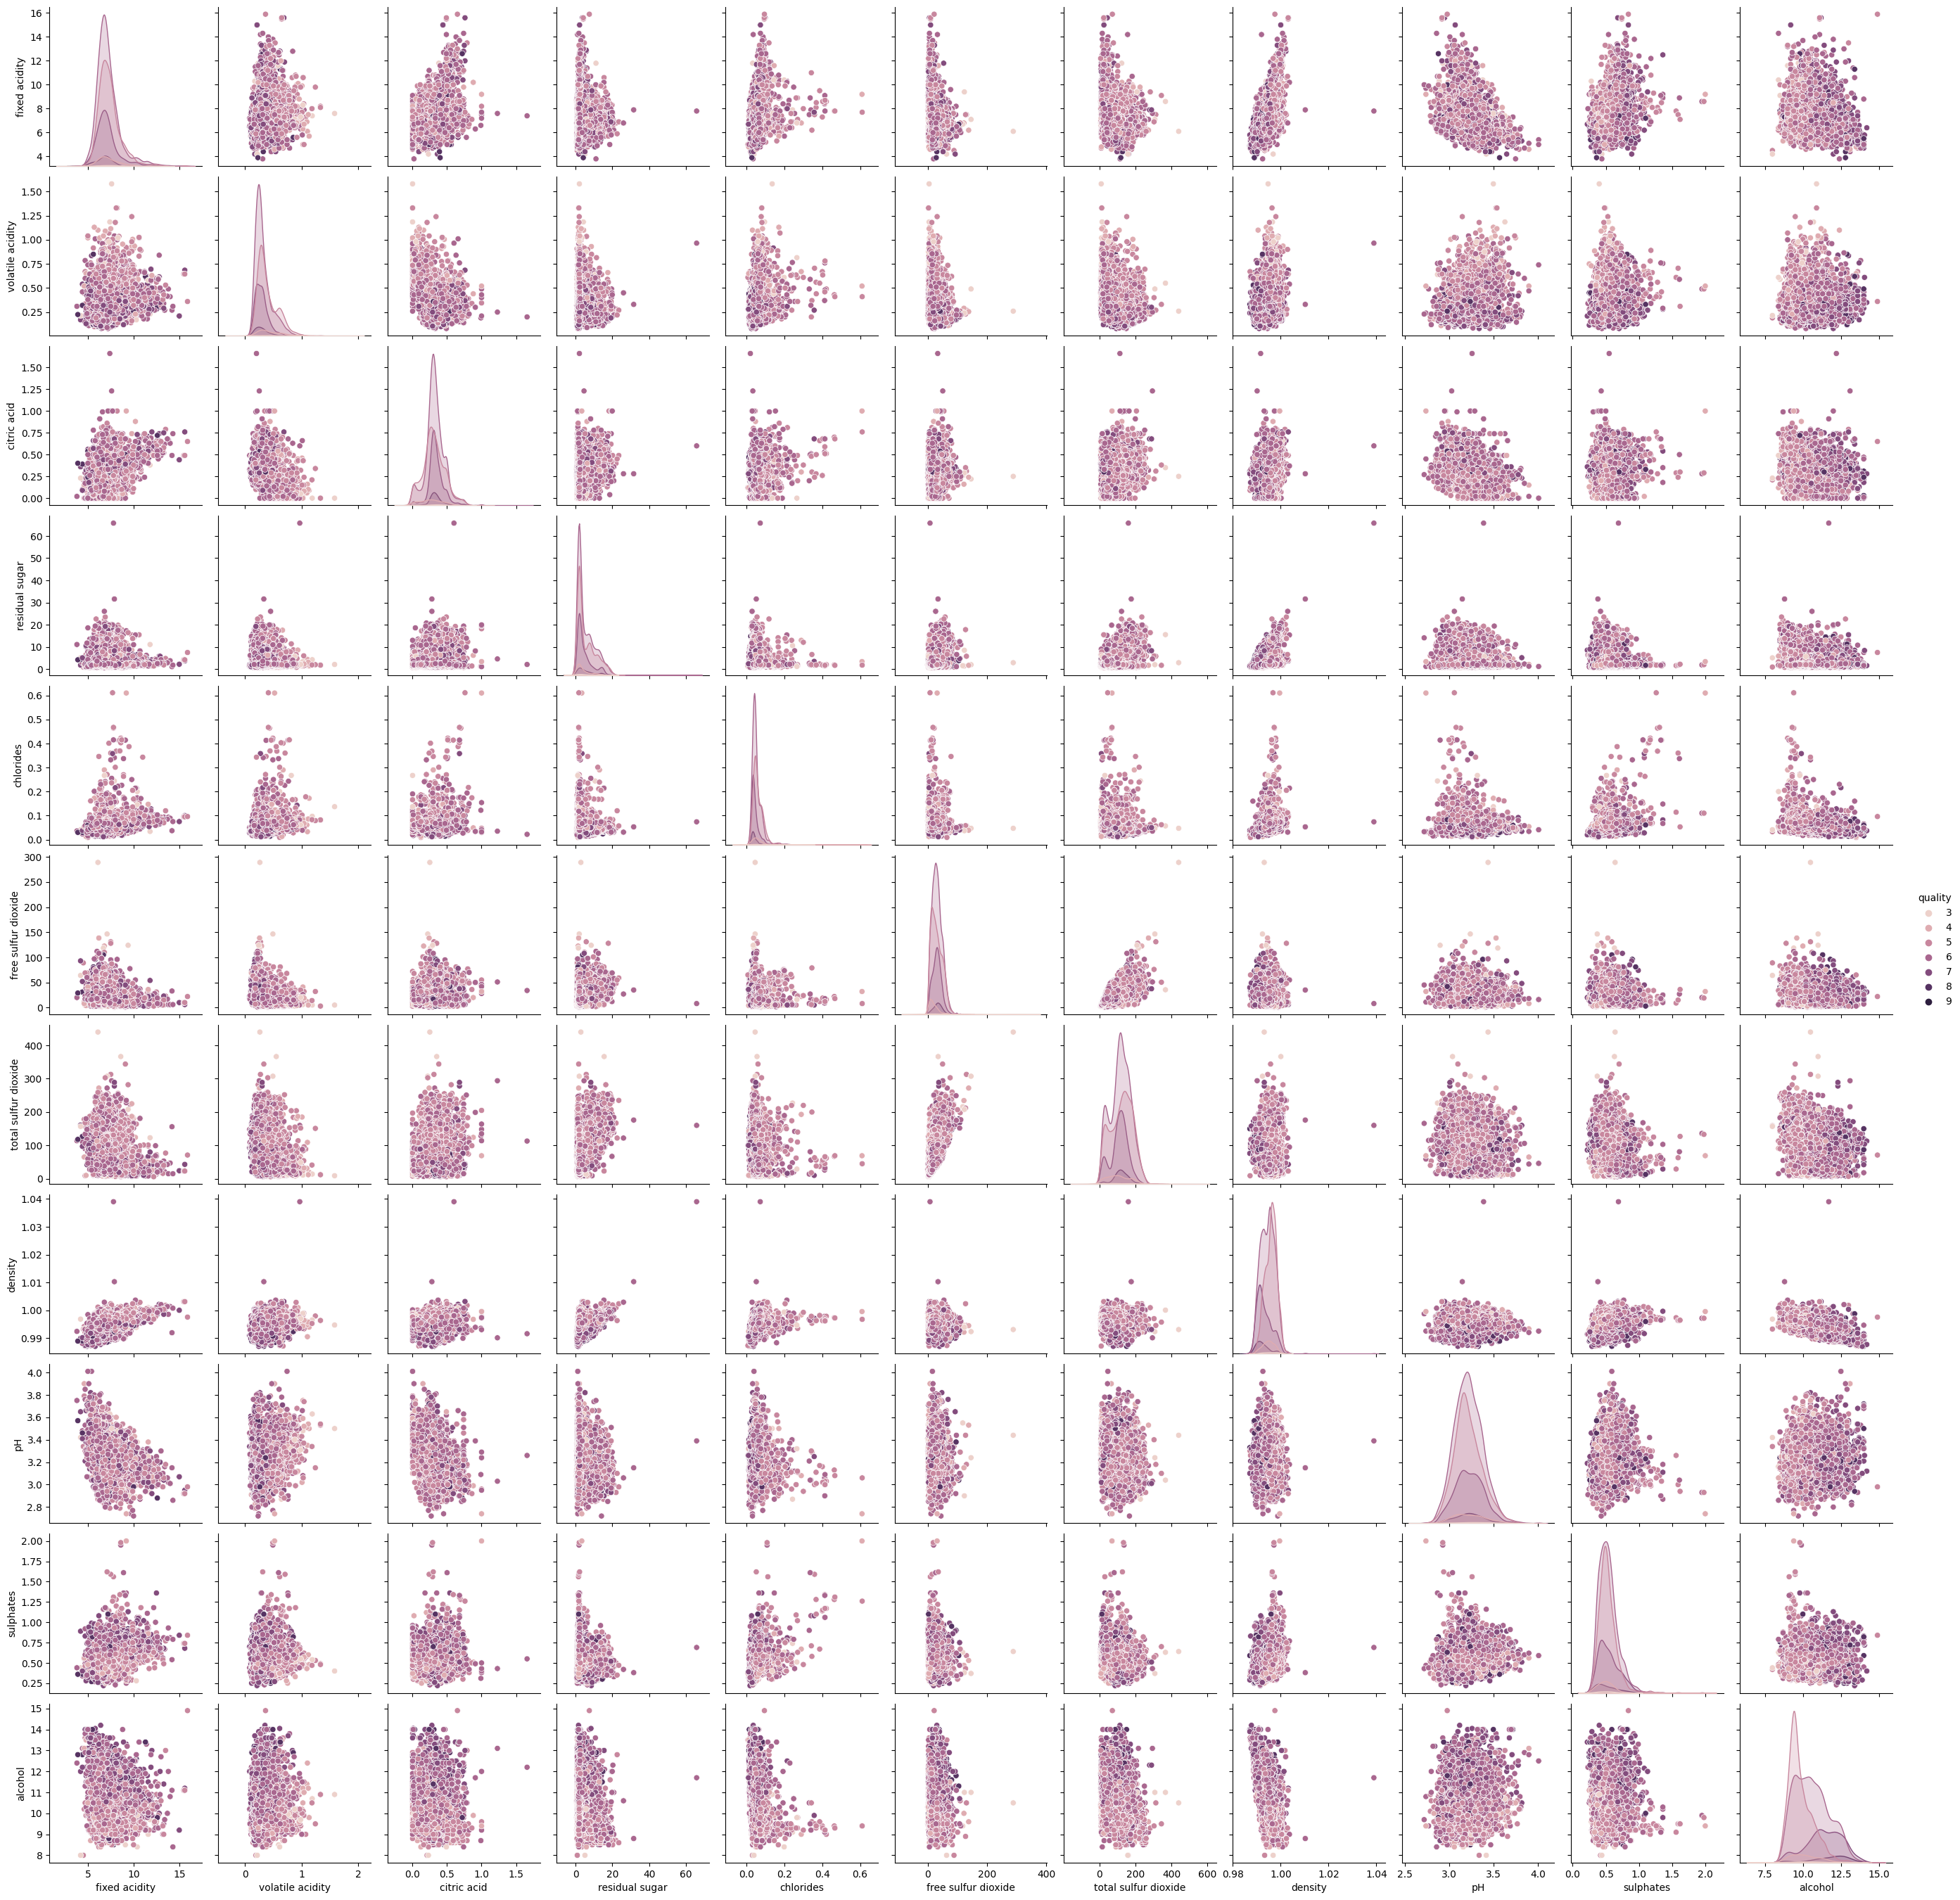

In [61]:
#Multivariate Analysis
plt.figure(figsize=(30, 15))
sb.pairplot(data=wine, hue='quality')
plt.show()

<ipython-input-13-b3c2b1f1d9bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(wine.corr(),annot=True)


<Axes: >

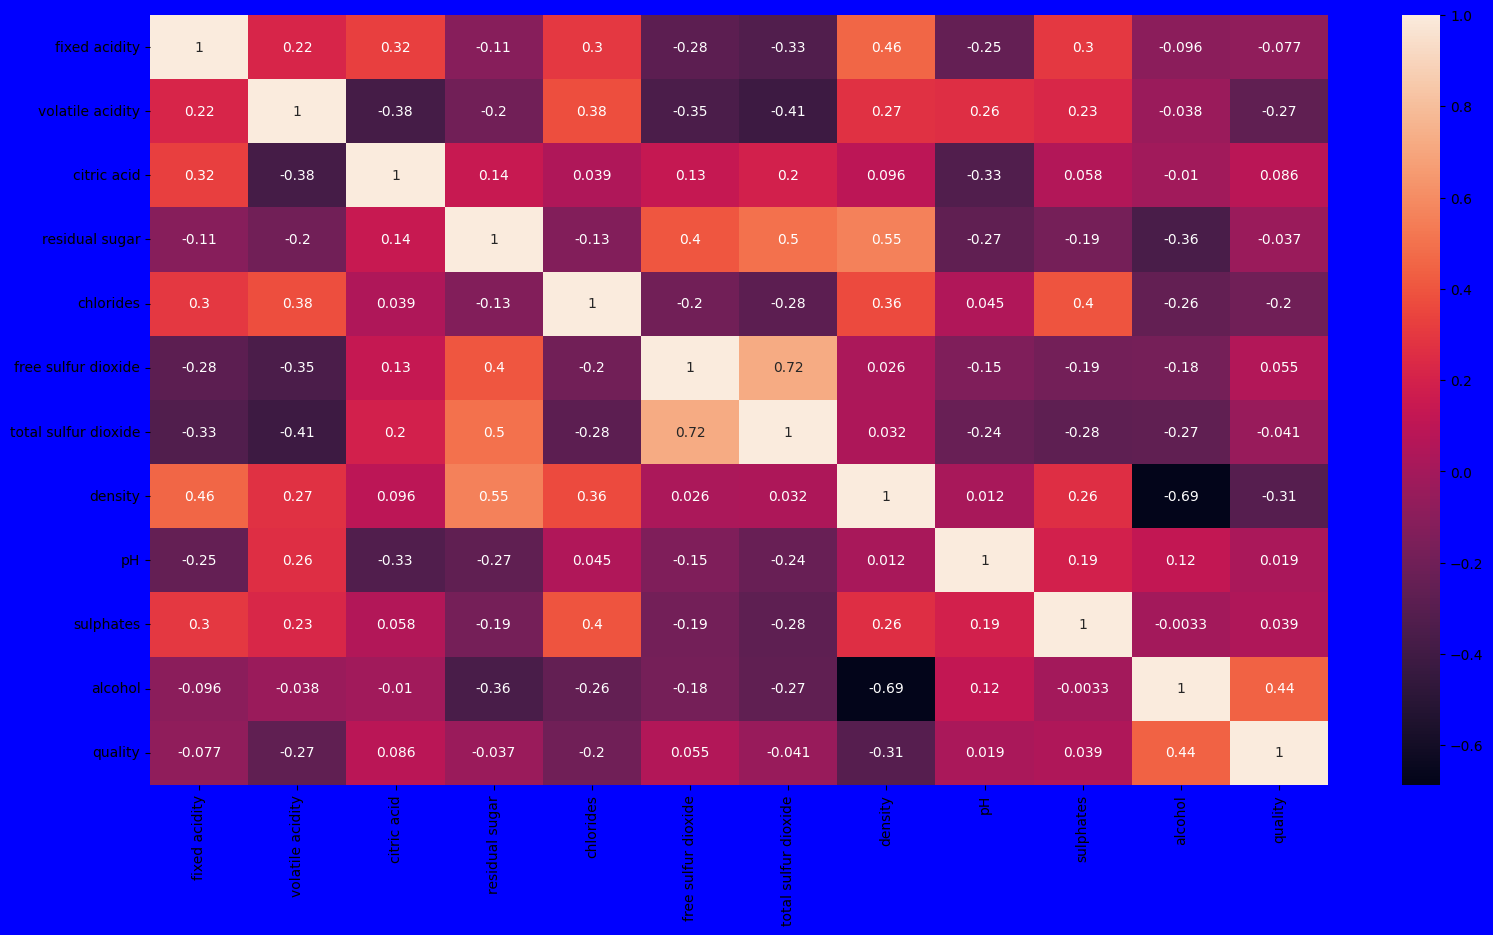

In [13]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(wine.corr(),annot=True)

Now, we have to find those features that are fully correlated to each other by this we reduce the number of features from the data.

In [14]:

for a in range(len(wine.corr().columns)):
    for b in range(a):
        if abs(wine.corr().iloc[a,b]) >0.7:
            name = wine.corr().columns[a]
            print(name)

<ipython-input-14-b2e9a4146d97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for a in range(len(wine.corr().columns)):
<ipython-input-14-b2e9a4146d97>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(wine.corr().iloc[a,b]) >0.7:
<ipython-input-14-b2e9a4146d97>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  name = wine.corr().columns[a]


total sulfur dioxide


In [16]:
new_wine=wine.drop('total sulfur dioxide',axis=1)

<ipython-input-18-6d915c724d26>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(new_wine.corr(),annot=True)


<Axes: >

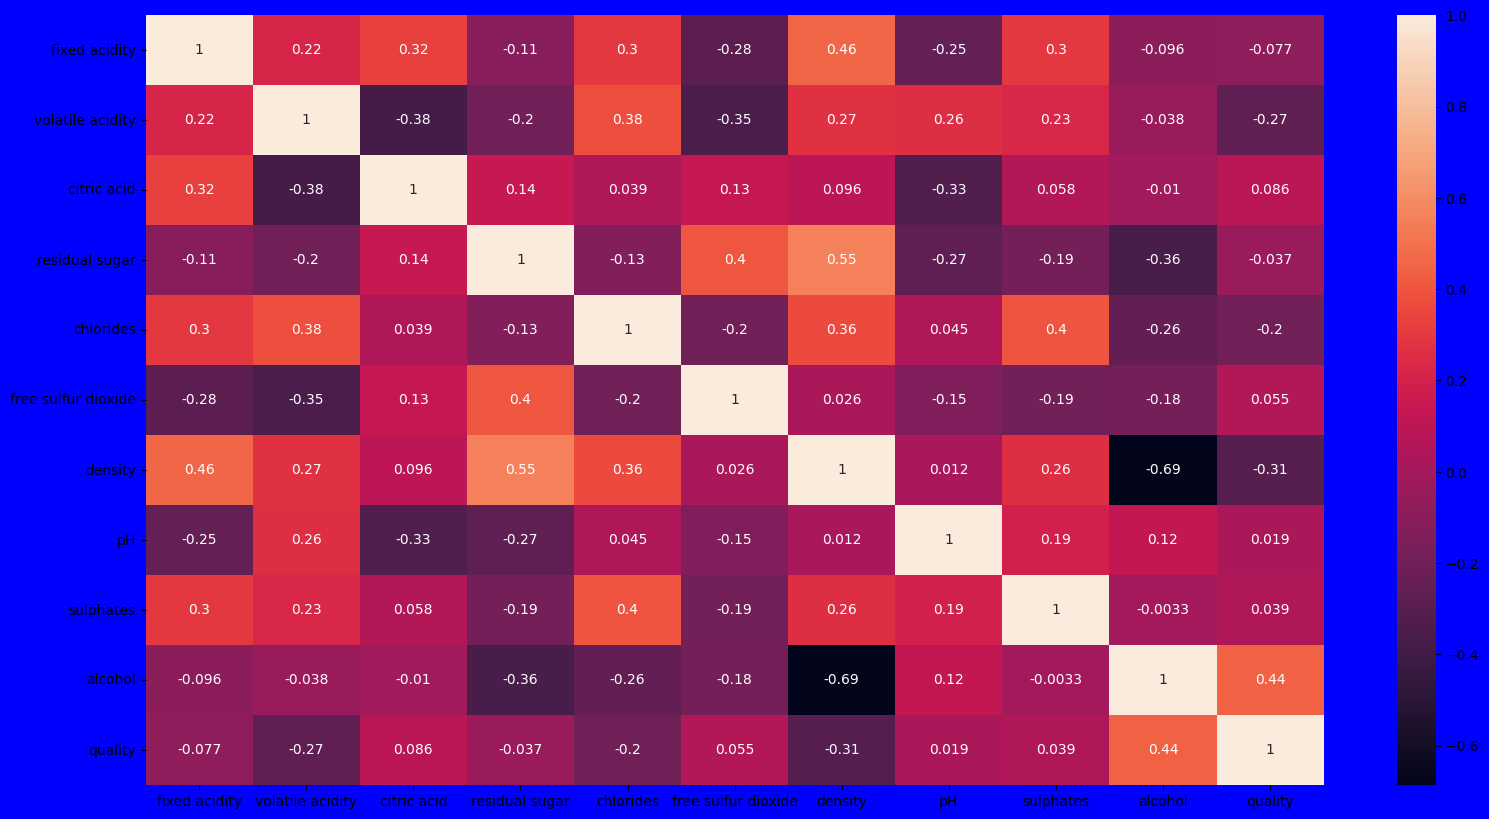

In [18]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(new_wine.corr(),annot=True)

## **Handle null values**

In [20]:
new_wine.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [22]:
new_wine.update(new_wine.fillna(new_wine.mean()))

<ipython-input-22-ae10a555ca56>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_wine.update(new_wine.fillna(new_wine.mean()))


In [23]:
new_wine.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [26]:
# catogerical vars
next_wine = pd.get_dummies(new_wine,drop_first=True)
# display new dataframe
next_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0                    45.0  1.00100  3.00   0.450000      8.8        6   
1                    14.0  0.99400  3.30   0.490000      9.5        6   
2                    30.0  0.99510  3.26   0.440000     10.1        6   
3                    47.0  0.99560  3.19   0.400000      9.9        6   
4                    47.0  0.99560  3.19   0.400000      9.9        6   
...                   ...      ...   ...        ...      ...      ...   
6492                 32.0  0.99490  3.45   0.580000     10.5        5   
6493                 39.0  0.99512  3.52   0.531215     11.2        6   
6494                 29.0  0.99574  3.42   0.750000     11.0        6   
6495                 32.0  0.99547  3.57   0.710000     10.2        5   
6496                 18.0  0.99549  3.39   0.660000     11.0        6   

      type_white  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
6492           0  
6493           0  
6494           0  
6495           0  
6496           0  

[6497 rows x 12 columns]

In [31]:
next_wine["best quality"] = [ 1 if x>=7 else 0 for x in wine.quality]
next_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0                    45.0  1.00100  3.00   0.450000      8.8        6   
1                    14.0  0.99400  3.30   0.490000      9.5        6   
2                    30.0  0.99510  3.26   0.440000     10.1        6   
3                    47.0  0.99560  3.19   0.400000      9.9        6   
4                    47.0  0.99560  3.19   0.400000      9.9        6   
...                   ...      ...   ...        ...      ...      ...   
6492                 32.0  0.99490  3.45   0.580000     10.5        5   
6493                 39.0  0.99512  3.52   0.531215     11.2        6   
6494                 29.0  0.99574  3.42   0.750000     11.0        6   
6495                 32.0  0.99547  3.57   0.710000     10.2        5   
6496                 18.0  0.99549  3.39   0.660000     11.0        6   

      type_white  best quality  
0              1             0  
1              1             0  
2              1             0  
3              1             0  
4              1             0  
...          ...           ...  
6492           0             0  
6493           0             0  
6494           0             0  
6495           0             0  
6496           0             0  

[6497 rows x 13 columns]

### in this dataset ‘Type’ feature contains two types Red and White, where Red consider as 0 and white considers as 1.

# **Splitting dataset**

In [62]:
column_train=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","density","pH","sulphates","alcohol"]
x=next_wine[column_train]
y=next_wine["quality"]

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=40)

# **Normalization**

In [64]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.34710744 0.1        0.22289157 ... 0.46511628 0.14044944 0.26086957]
 [0.20661157 0.18       0.15662651 ... 0.30232558 0.15168539 0.11594203]
 [0.24793388 0.06666667 0.18072289 ... 0.21705426 0.16853933 0.14492754]
 ...
 [0.33884298 0.38666667 0.         ... 0.5503876  0.20224719 0.2173913 ]
 [0.24793388 0.34       0.06024096 ... 0.53488372 0.25280899 0.24637681]
 [0.19008264 0.16666667 0.19277108 ... 0.51937984 0.24157303 0.2173913 ]]


# **Applying Model**

In [65]:
from sklearn.linear_model import LinearRegression
Lrgr= LinearRegression()
Lrgr.fit(x_train,y_train)

LinearRegression()

In [67]:
# Test prediction (Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol)
print(Lrgr.predict([[15, 0.01, 0, 5, 0.001, 30, 0.95, 3, 0.9, 15]]))

[9.82662358]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Evaluation**


In [70]:
# Ordinary Least Square (OLS) Principle
x = sm.add_constant(x_train)
model = sm.OLS(y_train, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     206.7
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:43:11   Log-Likelihood:                -5779.1
No. Observations:                5197   AIC:                         1.158e+04
Df Residuals:                    5186   BIC:                         1.165e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  34.2280    

In [72]:
# Evaluate our model using MSE criterion
y_pred = Lrgr.predict(x_test)
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE):  0.5694187989872577


In [73]:
# Check quality value from dataset that is listed
print(next_wine['quality'].unique())

[6 5 7 8 4 3 9]


In [74]:
# MAPE
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

In [75]:
mape(y_test, y_pred)
# Error of our model is approximately 8-9% (Excellent)
# MAPE result Notes :
# 1. Below 10% = Excellent
# 2. 10% - 20% = Good
# 3. 21% - 50% = Reasonable
# 4. Above 50% = Inaccurate

10.36550299232918

### So the conclusion that we got, our MAPE result is 10.36550299232918 which is approximately 10% (Excellent)

# THANKS.